# Voting
## This notebook outlines the Voting technique used in Ensembling of Machine Learning Models

### Dataset
Predict Loan Eligibility for Dream Housing Finance company

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

Train: https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv

Test: https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_test.csv

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

### Read the dataset

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv")

In [5]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Split them into categorical and numerical features

In [9]:
cat_df = df[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status']]

In [10]:
num_df = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']]

In [11]:
y_df = df[['Loan_Status']]

In [12]:
y_df

,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y
...,...
609,Y
610,Y
611,Y
612,Y


### Check missing values in categorical features

<Axes: >

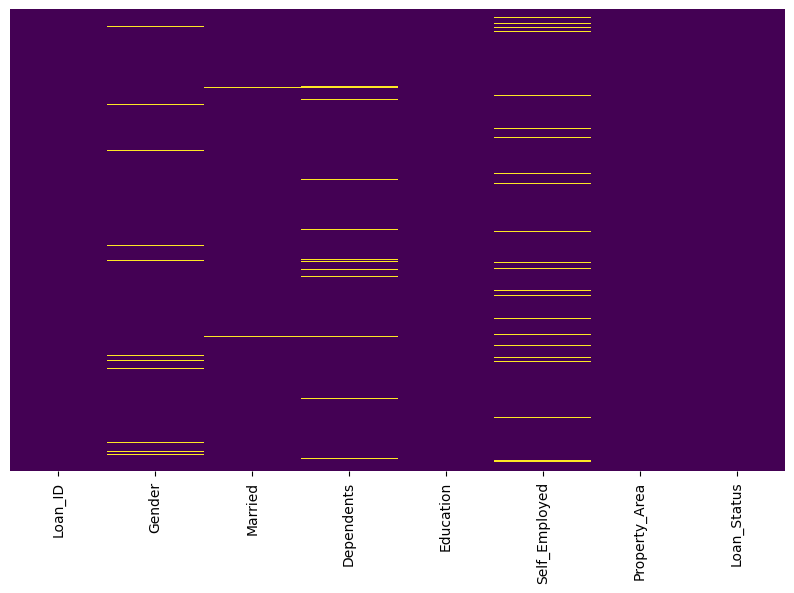

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(cat_df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Imputing Categorical features
- Gender
- Married
- Dependents
- Self_Employed

### Find the most occuring values in the feature

### Gender

In [18]:
cat_df.Gender.value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

### Fill missing values with the most occuring value

In [20]:
cat_df['Gender'].fillna('Male', inplace=True)
cat_df.Gender.value_counts()

C:\Users\wayne\AppData\Local\Temp\ipykernel_40360\1754435369.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cat_df['Gender'].fillna('Male', inplace=True)
C:\Users\wayne\AppData\Local\Temp\ipykernel_40360\1754435369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['Gender'].fillna('Male', inplace=True)


Gender
Male      502
Female    112
Name: count, dtype: int64

### Sanity Check

<Axes: >

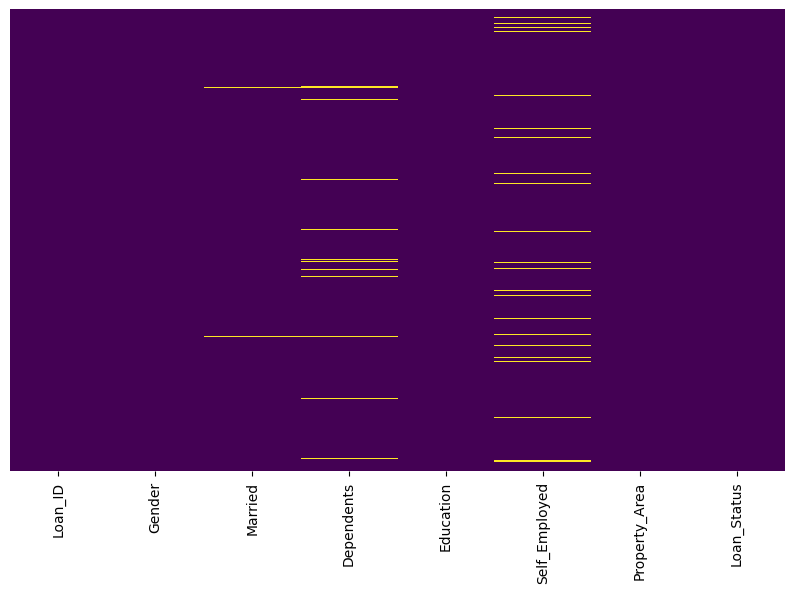

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(cat_df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Married

In [24]:
cat_df.Married.value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [26]:
cat_df['Married'].fillna("Yes", inplace=True)
cat_df.Married.value_counts()

C:\Users\wayne\AppData\Local\Temp\ipykernel_40360\3789398292.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cat_df['Married'].fillna("Yes", inplace=True)
C:\Users\wayne\AppData\Local\Temp\ipykernel_40360\3789398292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['Married'].fillna("Yes", inplace=True)


Married
Yes    401
No     213
Name: count, dtype: int64

<Axes: >

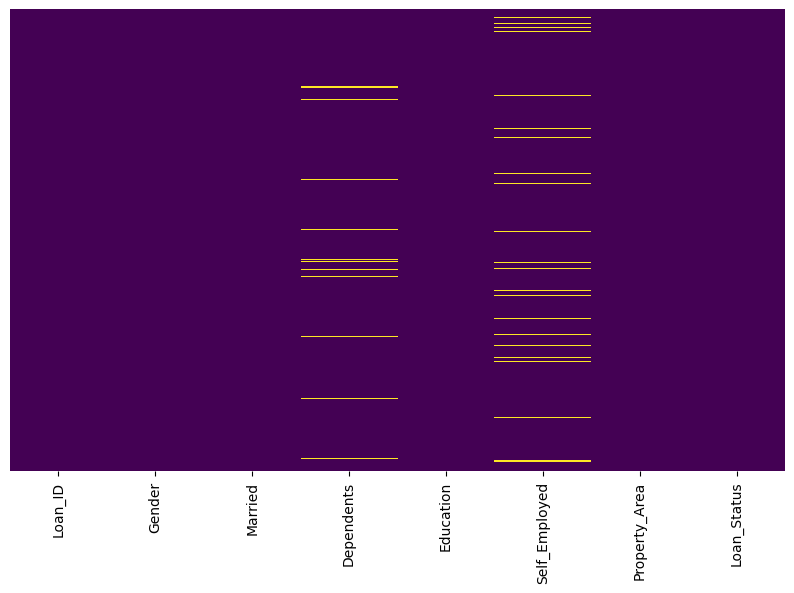

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(cat_df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Dependents

In [29]:
cat_df.Dependents.value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [30]:
cat_df['Dependents'].fillna("0", inplace=True)
cat_df.Dependents.value_counts()

C:\Users\wayne\AppData\Local\Temp\ipykernel_40360\678841989.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cat_df['Dependents'].fillna("0", inplace=True)
C:\Users\wayne\AppData\Local\Temp\ipykernel_40360\678841989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['Dependents'].fillna("0", inplace=True)


Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

<Axes: >

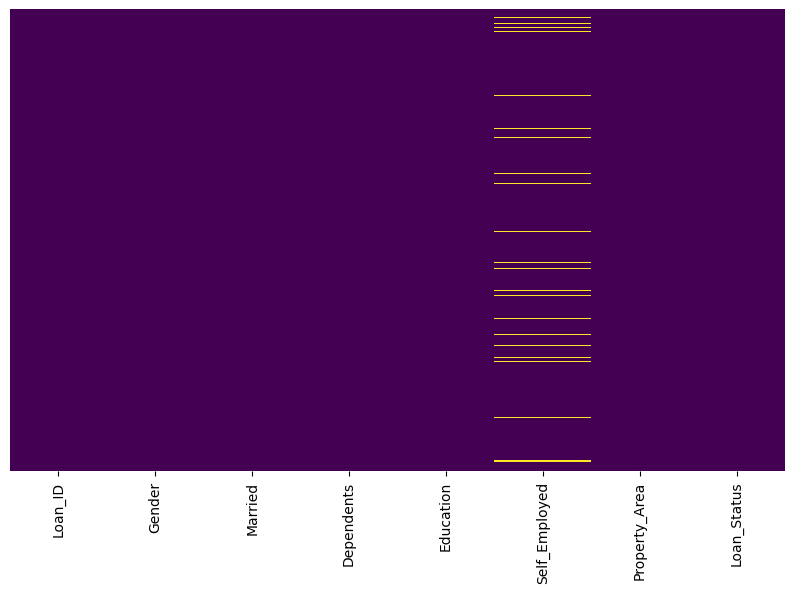

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(cat_df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Self_Employed

In [33]:
cat_df.Self_Employed.value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [34]:
cat_df['Self_Employed'].fillna("No", inplace=True)

C:\Users\wayne\AppData\Local\Temp\ipykernel_40360\2406838797.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cat_df['Self_Employed'].fillna("No", inplace=True)
C:\Users\wayne\AppData\Local\Temp\ipykernel_40360\2406838797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['Self_Employed'].fillna("No", inplace=True)


<Axes: >

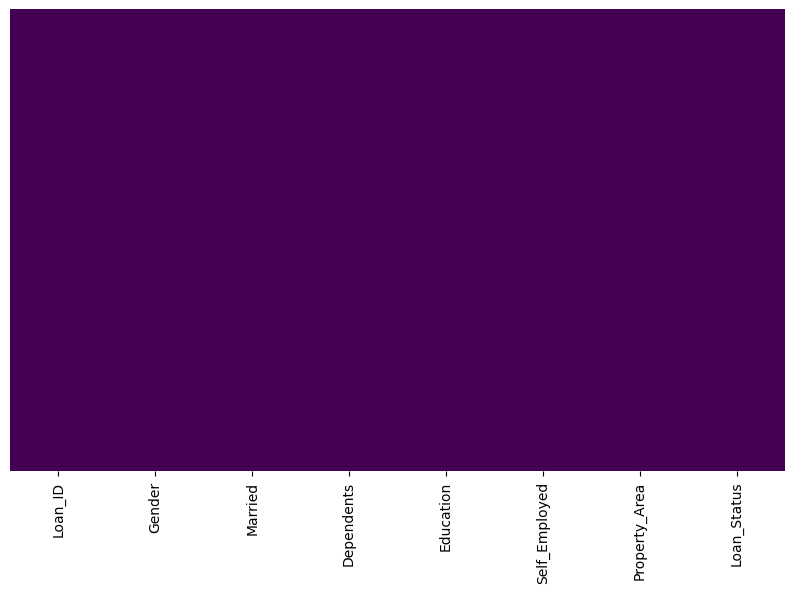

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(cat_df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Checking the missing values in Numerical features

<Axes: >

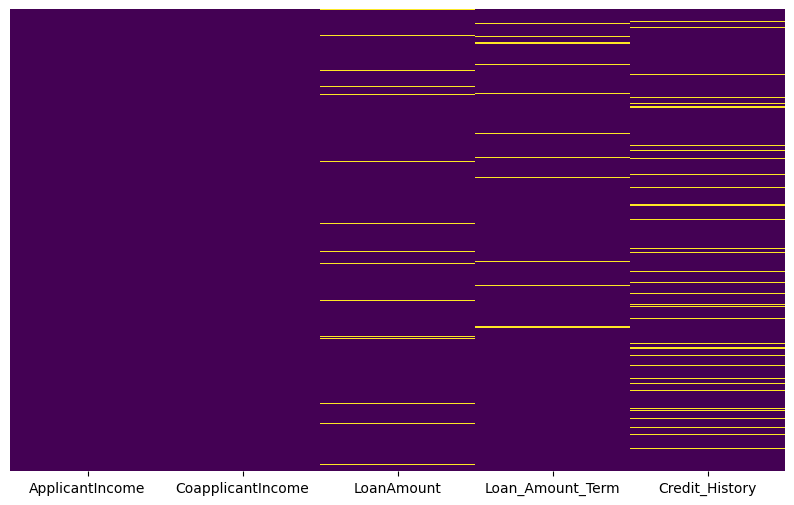

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(num_df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Impute the missing values forr numerical features

In [39]:
from sklearn.impute import SimpleImputer

In [40]:
imputer = SimpleImputer(strategy='mean')

### Fit on the features

In [42]:
imputer.fit(num_df)

SimpleImputer()

In [43]:
num_df_transform = imputer.transform(num_df)

In [44]:
num_df = pd.DataFrame(data=num_df_transform)
num_df.columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']
num_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,146.412162,360.0,1.0
1,4583.0,1508.0,128.000000,360.0,1.0
2,3000.0,0.0,66.000000,360.0,1.0
3,2583.0,2358.0,120.000000,360.0,1.0
4,6000.0,0.0,141.000000,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.000000,360.0,1.0
610,4106.0,0.0,40.000000,180.0,1.0
611,8072.0,240.0,253.000000,360.0,1.0
612,7583.0,0.0,187.000000,360.0,1.0


<Axes: >

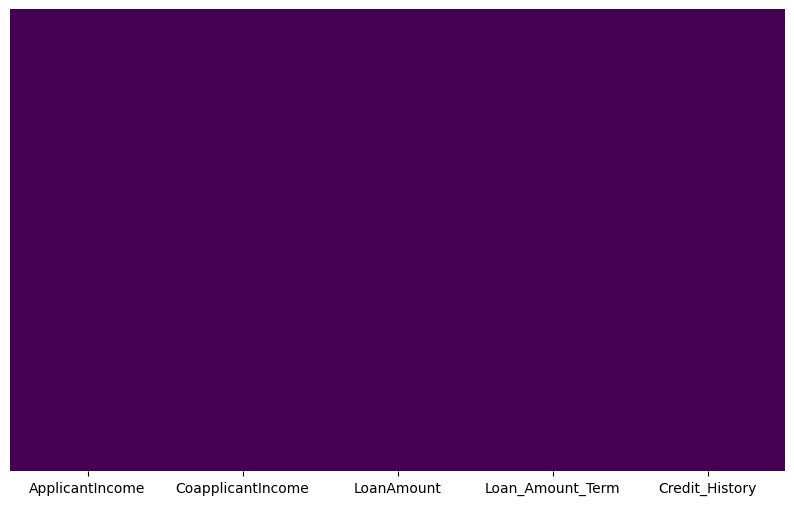

In [45]:
plt.figure(figsize=(10,6))
sns.heatmap(num_df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Convert Categorical features into Numerical features

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
label_encoder = LabelEncoder()

In [51]:
def clean_dep(x):
    return x[0]

In [52]:
cat_df['Property_Area']= label_encoder.fit_transform(cat_df['Property_Area'])
cat_df['Gender']= label_encoder.fit_transform(cat_df['Gender'])
cat_df['Education']= label_encoder.fit_transform(cat_df['Education']) 
cat_df['Self_Employed']= label_encoder.fit_transform(cat_df['Self_Employed'])
cat_df['Married']= label_encoder.fit_transform(cat_df['Married'])
cat_df['Dependents'] = cat_df['Dependents'].apply(clean_dep)
cat_df['Dependents']= label_encoder.fit_transform(cat_df['Dependents'])
cat_df['Loan_Status']= label_encoder.fit_transform(cat_df['Loan_Status'])
cat_df

C:\Users\wayne\AppData\Local\Temp\ipykernel_40360\2185607541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['Property_Area']= label_encoder.fit_transform(cat_df['Property_Area'])
C:\Users\wayne\AppData\Local\Temp\ipykernel_40360\2185607541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['Gender']= label_encoder.fit_transform(cat_df['Gender'])
C:\Users\wayne\AppData\Local\Temp\ipykernel_40360\2185607541.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,2,1
1,LP001003,1,1,1,0,0,0,0
2,LP001005,1,1,0,0,1,2,1
3,LP001006,1,1,0,1,0,2,1
4,LP001008,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,0,1
610,LP002979,1,1,3,0,0,0,1
611,LP002983,1,1,1,0,0,2,1
612,LP002984,1,1,2,0,0,2,1


In [53]:
cat_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [54]:
cat_df = cat_df.drop('Loan_ID', axis=1)
cat_df

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1
610,1,1,3,0,0,0,1
611,1,1,1,0,0,2,1
612,1,1,2,0,0,2,1


### Concatenate the numerical features and categorical features

In [57]:
df_transform = pd.concat([cat_df, num_df], axis=1)
df_transform

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,1,5849.0,0.0,146.412162,360.0,1.0
1,1,1,1,0,0,0,0,4583.0,1508.0,128.000000,360.0,1.0
2,1,1,0,0,1,2,1,3000.0,0.0,66.000000,360.0,1.0
3,1,1,0,1,0,2,1,2583.0,2358.0,120.000000,360.0,1.0
4,1,0,0,0,0,2,1,6000.0,0.0,141.000000,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1,2900.0,0.0,71.000000,360.0,1.0
610,1,1,3,0,0,0,1,4106.0,0.0,40.000000,180.0,1.0
611,1,1,1,0,0,2,1,8072.0,240.0,253.000000,360.0,1.0
612,1,1,2,0,0,2,1,7583.0,0.0,187.000000,360.0,1.0


### Sanity check
- Check for missing values
- Check for categorical features

<Axes: >

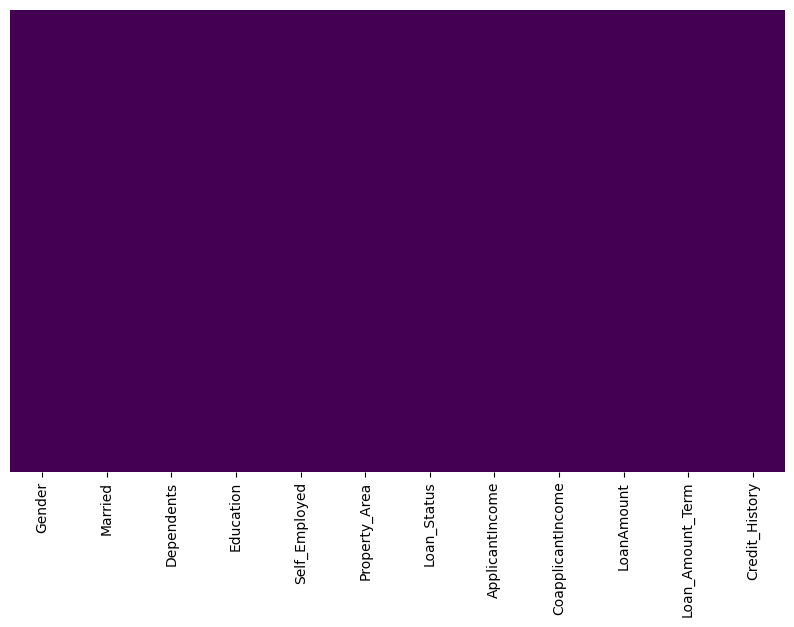

In [59]:
plt.figure(figsize=(10,6))
sns.heatmap(df_transform.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [69]:
df_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   Property_Area      614 non-null    int32  
 6   Loan_Status        614 non-null    int32  
 7   ApplicantIncome    614 non-null    float64
 8   CoapplicantIncome  614 non-null    float64
 9   LoanAmount         614 non-null    float64
 10  Loan_Amount_Term   614 non-null    float64
 11  Credit_History     614 non-null    float64
dtypes: float64(5), int32(7)
memory usage: 40.9 KB


### Split them into X and y

In [76]:
df_transform

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,1,5849.0,0.0,146.412162,360.0,1.0
1,1,1,1,0,0,0,0,4583.0,1508.0,128.000000,360.0,1.0
2,1,1,0,0,1,2,1,3000.0,0.0,66.000000,360.0,1.0
3,1,1,0,1,0,2,1,2583.0,2358.0,120.000000,360.0,1.0
4,1,0,0,0,0,2,1,6000.0,0.0,141.000000,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1,2900.0,0.0,71.000000,360.0,1.0
610,1,1,3,0,0,0,1,4106.0,0.0,40.000000,180.0,1.0
611,1,1,1,0,0,2,1,8072.0,240.0,253.000000,360.0,1.0
612,1,1,2,0,0,2,1,7583.0,0.0,187.000000,360.0,1.0


In [77]:
X = df_transform.drop('Loan_Status', axis=1)
X

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,5849.0,0.0,146.412162,360.0,1.0
1,1,1,1,0,0,0,4583.0,1508.0,128.000000,360.0,1.0
2,1,1,0,0,1,2,3000.0,0.0,66.000000,360.0,1.0
3,1,1,0,1,0,2,2583.0,2358.0,120.000000,360.0,1.0
4,1,0,0,0,0,2,6000.0,0.0,141.000000,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,2900.0,0.0,71.000000,360.0,1.0
610,1,1,3,0,0,0,4106.0,0.0,40.000000,180.0,1.0
611,1,1,1,0,0,2,8072.0,240.0,253.000000,360.0,1.0
612,1,1,2,0,0,2,7583.0,0.0,187.000000,360.0,1.0


In [78]:
y = df_transform['Loan_Status']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [79]:
X.shape, y.shape

((614, 11), (614,))

### Import the libraries

In [83]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

### Load the dataset

In [110]:
#

### Split into X and y

In [115]:
X = df_transform.drop('Loan_Status', axis=1)
y = df_transform['Loan_Status']

### Split dataset into train and test


In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((429, 11), (185, 11), (429,), (185,))

### Import the models
- Logistic Regression
- KNN
- Decision Tree

In [128]:
#

### Build 3 models

In [131]:
log_reg = LogisticRegression(random_state=1)
decision_tree = DecisionTreeClassifier(random_state=1)
knn = KNeighborsClassifier()


### Build the VotingClassifier model with the built models

In [134]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_reg), ('knn', knn), ('dt', decision_tree)], voting='hard')

### Fit the VotingClassifier model

In [137]:
voting_clf.fit(X_train, y_train)


C:\Users\wayne\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=1)),
                             ('knn', KNeighborsClassifier()),
                             ('dt', DecisionTreeClassifier(random_state=1))])

### Get the Score

In [140]:
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Voting Classifier Accuracy: {accuracy:.4f}')


Voting Classifier Accuracy: 0.8216


In [142]:
voting_clf.score(X_test, y_test)

0.8216216216216217

In [144]:
#上面跟下面的accuracy_score差的區別只是 random_state=0的不一樣所導致的

In [146]:
#score(X_test, y_test) 的功能
#適用於分類和回歸模型。
#對於分類問題（如本例中的貸款資格預測），它返回準確率（Accuracy Score）。
#對於回歸問題，它返回R² 決定係數（Coefficient of Determination, R² Score）。

#這與 accuracy_score(y_test, y_pred) 結果相同，但不需要先調用 .predict(X_test)。

In [148]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint

In [86]:
models = [
    ('lr', LogisticRegression()),
    ('knn', KNeighborsClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier()),
    ('ada', AdaBoostClassifier()),
    ('svc', SVC()),
    ('nb', GaussianNB()),
    ('mlp', MLPClassifier()),
]

# Build Voting Classifier with the 30 models
voting_clf = VotingClassifier(estimators=models, voting='hard')

# Fit the Voting Classifier model
voting_clf.fit(X_train, y_train)

# Get the Score
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Voting Classifier Accuracy with  models: {accuracy:.4f}')

for name, model in models:
    model.fit(X_train, y_train)  # Train each model
    y_pred = model.predict(X_test)  # Predict using the trained model
    acc = accuracy_score(y_test, y_pred)  # Compute accuracy
    print(f'Accuracy of {name}: {acc:.4f}')

C:\Users\wayne\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\wayne\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Voting Classifier Accuracy with  models: 0.8216
Accuracy of lr: 0.8324
Accuracy of knn: 0.6270
Accuracy of dt: 0.7351


C:\Users\wayne\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of rf: 0.7892
Accuracy of gb: 0.7946


C:\Users\wayne\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy of ada: 0.8000
Accuracy of svc: 0.7243
Accuracy of nb: 0.8216
Accuracy of mlp: 0.4432


In [ ]:
#找出最佳的param 要跑很久可以直接看下面的答案
param_distributions = {
    'lr': {'C': np.logspace(-3, 3, 7)},
    'knn': {'n_neighbors': randint(1, 20)},
    'dt': {'max_depth': randint(1, 20)},
    'rf': {'n_estimators': randint(50, 200), 'max_depth': randint(1, 20)},
    'gb': {'n_estimators': randint(50, 200), 'learning_rate': np.linspace(0.01, 0.3, 10)},
    'ada': {'n_estimators': randint(50, 200), 'learning_rate': np.linspace(0.01, 1, 10)},
    'svc': {'C': np.logspace(-3, 3, 7), 'kernel': ['linear', 'rbf']},
    'mlp': {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'alpha': np.logspace(-3, 3, 7)},
}

models = {
    'lr': LogisticRegression(),
    'knn': KNeighborsClassifier(),
    'dt': DecisionTreeClassifier(),
    'rf': RandomForestClassifier(),
    'gb': GradientBoostingClassifier(),
    'ada': AdaBoostClassifier(),
    'svc': SVC(),
    'nb': GaussianNB(),
    'mlp': MLPClassifier(max_iter=500),
}

best_models = []
for name, model in models.items():
    if name in param_distributions:
        rand_search = RandomizedSearchCV(model, param_distributions[name], n_iter=10, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)
        rand_search.fit(X_train, y_train)
        best_models.append((name, rand_search.best_estimator_))
        print(f'Best parameters for {name}: {rand_search.best_params_}')
    else:
        model.fit(X_train, y_train)
        best_models.append((name, model))

# Build Voting Classifier with the best models
voting_clf = VotingClassifier(estimators=best_models, voting='hard')

# Fit the Voting Classifier model
voting_clf.fit(X_train, y_train)

# Get the Score
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Voting Classifier Accuracy with Tuned Models: {accuracy:.4f}')


In [88]:
# Build 5 RandomForest models with different hyperparameters
models = [(f'rf_{i}', RandomForestClassifier(n_estimators=100, max_depth=i+1, random_state=42)) for i in range(5)]

# Build Voting Classifier with the 30 RandomForest models
voting_clf = VotingClassifier(estimators=models, voting='hard')

# Fit the Voting Classifier model
voting_clf.fit(X_train, y_train)

# Get the Score
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Voting Classifier Accuracy with 30 RandomForest models: {accuracy:.4f}')


Voting Classifier Accuracy with 30 RandomForest models: 0.8270


In [150]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv")

# Handling missing values
imputer = SimpleImputer(strategy='most_frequent')
df.fillna(df.mode().iloc[0], inplace=True)

# Convert categorical variables to numerical
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features and target variable
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models with best hyperparameters
models = [
    ('lr', LogisticRegression(C=1.0)),
    ('knn', KNeighborsClassifier(n_neighbors=11)),
    ('dt', DecisionTreeClassifier(max_depth=4)),
    ('rf', RandomForestClassifier(max_depth=2, n_estimators=137, random_state=42)),
    ('gb', GradientBoostingClassifier(learning_rate=0.042222222222222223, n_estimators=137, random_state=42)),
    ('ada', AdaBoostClassifier(learning_rate=0.12, n_estimators=137, random_state=42)),
    ('svc', SVC(kernel='linear', C=0.1, probability=True)),
    ('nb', GaussianNB()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(50, 50), alpha=0.1, max_iter=500, random_state=42)),
]

# Evaluate individual model accuracy
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'Accuracy of {name}: {acc:.4f}')

# Build Voting Classifier with the best models
voting_clf = VotingClassifier(estimators=models, voting='hard')

# Fit the Voting Classifier model
voting_clf.fit(X_train, y_train)

# Get the Score
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Voting Classifier Accuracy with Tuned Best Parameters: {accuracy:.4f}')

C:\Users\wayne\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of lr: 0.7561
Accuracy of knn: 0.6016
Accuracy of dt: 0.7724
Accuracy of rf: 0.7886
Accuracy of gb: 0.7805


C:\Users\wayne\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy of ada: 0.7967
Accuracy of svc: 0.7724
Accuracy of nb: 0.7886
Accuracy of mlp: 0.3984


C:\Users\wayne\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\wayne\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Voting Classifier Accuracy with Tuned Best Parameters: 0.7886
